In [6]:
import os
#os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = pow(2,50).__str__()
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [11]:
def identify_alum(filename):
    img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)

    # convert to hsv and get saturation channel
    sat = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)[:,:,1]

    # do a little Gaussian filtering
    blur = cv2.GaussianBlur(sat, (3,3), 0)
    #(3,3) is the Gaussian kernel, 
    # blurring the image mitigates noise

    # threshold and invert to create initial mask
    mask = 255 - cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY)[1]
    # 100 is threshold val, 255 is maxval, THRESH_Bin is thresholding type
    # if >100 then set image's pixel to max, else set to 0

    # apply morphology close to fill interior regions in mask
    kernel = np.ones((15,15), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # get outer contours from inverted mask and get the largest (presumably only one due to morphology filtering)
    cntrs = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]
    result = img.copy()
    area_thresh = 0
    for c in cntrs:
        area = cv2.contourArea(c)
        if area > area_thresh:
            area = area_thresh
            big_contour = c

    # draw largest contour
    cv2.drawContours(result, [big_contour], -1, (0,0,255), 2)


    # write result to disk
    cv2.imwrite("shiny_mask.png", mask)
    cv2.imwrite("shiny_outline.png", result)

    # display it
    #cv2.imshow("IMAGE", img)
    #cv2.imshow("MASK", mask)
    #cv2.imshow("RESULT", result)
    cv2.waitKey(0)
    plt.imshow(img)
    plt.show()
    plt.imshow(mask)
    plt.show()
    plt.imshow(result)
    plt.show()

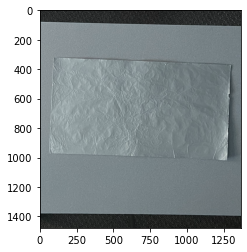

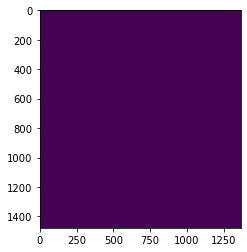

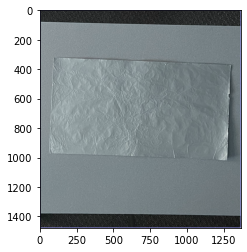

In [12]:
identify_alum('Straight_On.png')